In [2]:
import celerite2 as ct
from celerite2 import terms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import gefera as gf

In [5]:
ap = 215.0			# semimajor axis in stellar radii
tp = -91.25			# starting epoch in days
ep = 0.0			# eccentricity 
pp = 365			# period in days
wp = 0.1 * np.pi / 180		# longitude of periastron in degrees
ip = 89.8 * np.pi / 180		# inclination in degrees

In [6]:
am = 2			# semimajor axis of the moon's orbit around the planet in stellar radii
tm = -4.2			# starting epoch in days
em = 0.0			# eccentricity
pm = 8				# period in days
om = 90 * np.pi / 180		# longitude of the ascending node in degrees
wm = -90 * np.pi / 180		# longitude of periastron in degrees
im = 90.0 * np.pi / 180		# inclination in degrees
mm = 0.01			# mass of the moon in units of the mass of the planet

In [7]:
po = gf.orbits.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.orbits.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.systems.HierarchicalSystem(po, mo)

In [8]:
rp = 0.1
rm = 0.05
u1 = 0.5
u2 = 0.3

In [9]:
t = np.linspace(-0.6, 0.3, 10000)
# The out-of-transit flux is set to zero by default, so we add 1 to get the normalized flux.
flux = sys.lightcurve(t, u1, u2, rp, rm) + 1

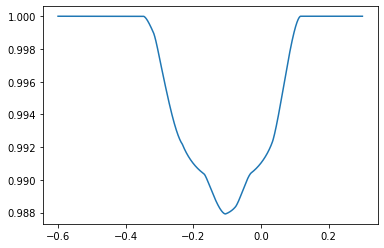

In [10]:
plt.plot(t,flux)

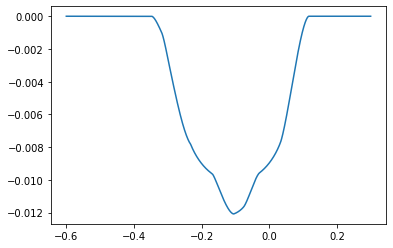

In [11]:
flux, grad = sys.lightcurve(t, u1, u2, rp, rm, grad=True)
plt.plot(t,flux)

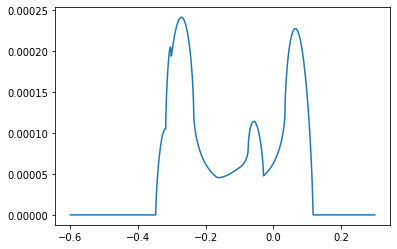

In [12]:
plt.plot(t,grad['a1'])

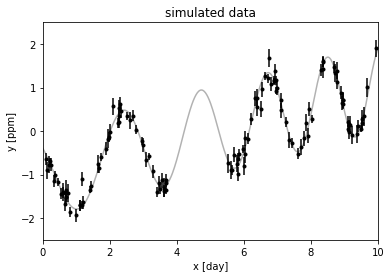

In [5]:
np.random.seed(42)

t = np.sort(
    np.append(
        np.random.uniform(0, 3.8, 57),
        np.random.uniform(5.5, 10, 68),
    )
)  # The input coordinates must be sorted
yerr = np.random.uniform(0.08, 0.22, len(t))
y = (
    0.2 * (t - 5)
    + np.sin(3 * t + 0.1 * (t - 5) ** 2)
    + yerr * np.random.randn(len(t))
)

true_t = np.linspace(0, 10, 500)
true_y = 0.2 * (true_t - 5) + np.sin(3 * true_t + 0.1 * (true_t - 5) ** 2)

plt.plot(true_t, true_y, "k", lw=1.5, alpha=0.3)
plt.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
plt.xlabel("x [day]")
plt.ylabel("y [ppm]")
plt.xlim(0, 10)
plt.ylim(-2.5, 2.5)
_ = plt.title("simulated data")

In [7]:
# Quasi-periodic term
term1 = terms.SHOTerm(sigma=1.0, rho=1.0, tau=10.0)

# Non-periodic component
term2 = terms.SHOTerm(sigma=1.0, rho=5.0, Q=0.25)
kernel = term1 + term2

# Setup the GP
gp = ct.GaussianProcess(kernel, mean=0.0)
gp.compute(t, yerr=yerr)

print("Initial log likelihood: {0}".format(gp.log_likelihood(y)))


Initial log likelihood: -16.75164079832625
